#! ls ./data_sets/* -lh
#https://github.com/chriswi93/Neural-Networks-and-Logistic-Regression-Backpropagation-in-depth

![Alt text](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41467-021-22197-x/MediaObjects/41467_2021_22197_Fig3_HTML.png?as=webp)

https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bib/22/4/10.1093_bib_bbaa268/1/m_bbaa268f1.jpeg?Expires=1695201196&Signature=1KEY92u4ZstK959i3C6haCKHZ7-6ghmNkBQwGELax4hVBn6N0o7lasyTNgnHk6sQ6eP2yiV~E51~X8JdkQkF9D5PfM7pk0N-z1rOF1HJpYaNBZ7IrUSqzdj-lQHw-TTBMjlW8rFKnSWg8~Y0y2y7q7a1hGweo3LHFNk7pSxu0kgYUaN54HwRrCWvpuMe0Eq~PL4oIh857EOSI9YaYyZ4U3ilKNy9bzbEHrLUiGOdfBBvJV09gq5g1Xp3rl49KqxwnpaFVs1qEj0z94TBYtJMDnUXEoV8ZXGJ2ESWxaXQRGziXBHA-b5l2Ac40c2eSVvTgqGFK2ClL0yGFZM5J458dg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA

In [1]:
# The cancer sample matrix was normalized by the Z-score method, 
#which scaled the mean of each row (corresponding to feature edge) to zero and variance to one. 
#First, the rows of the matrix were clustered using hierarchical clustering based on the complete linkage method with the cluster number set to 100, 
#and clusters containing more than 30 edges were retained.
#We then computed the mean values of perturbation for each edge in each subtype through Z-scores.
#For each subtype, we counted the percentage of edges whose absolute value of the average perturbation was greater than 0.5 in each retained cluster. 
#A cluster with a percentage greater than 70% was regarded as a perturbed cluster for this subtype. 
#All edges in all of the perturbed clusters for each subtype constituted the subtype-specific networks.
#All genes involved in each subtype-specific network were used for pathway enrichment analysis by Metascape (http://metascape.org). 
#The KEGG and Reactome pathways with a P-value less than 0.01 were retained. 
#Finally, the subtype-specific pathways were identified.

#grouping based on shared genes


#network = nodes = cell
#edges = shared gene expression above mean -> only retain those above 30 
#graeter than > .5 of the zscore
#a cluster with a percentage greater than ??? (look at ribosomes)
# https://metascape.org/blog/
import scipy

In [15]:
#more datasets
from scipy.sparse import csr_matrix, find
import numpy as np
import warnings
import pandas 
pandas.set_option('mode.use_inf_as_na', True)

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# This is required to catch warnings when the multiprocessing module is used
import os

os.environ["PYTHONWARNINGS"] = "ignore"
import scanpy as sc

np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
import numpy as np
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
from collections import defaultdict
rowGeneExpression2 = defaultdict(dict)
import math
import torch


#one ='DatlingerBock2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
folders = '/home/awahab/llm-testing/data_sets/'
#one = 'AdamsonWeissman2016_GSM2406675_10X001.h5ad' #sigmoid returns nan in 0th frame
one ='DatlingerBock2017.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
one = 'SrivatsanTrapnell2020_sciplex2.h5ad'
one ='DatlingerBock2017.h5ad'


adata = sc.read_h5ad(folders + one)
#2. Non-negative matrix factorization (NMF)
#3. Linear discriminant analysis (LDA)
#adata.obs

sc.pp.log1p(adata)
#sc.pp.highly_variable_genes(adata)
sc.pp.highly_variable_genes(adata, 
                                layer=None, 
                                n_top_genes=200, 
                                min_disp=0.5, 
                                max_disp=1, 
                                min_mean=0.0125, 
                                max_mean=3, 
                                span=0.3, 
                                n_bins=20, 
                                flavor='seurat_v3', 
                                subset=False, 
                                inplace=True, 
                                batch_key=None, 
                                check_values=True)

sc.pp.pca(adata)
#M = adata.X[:5000, ]
found = find(adata.X)
torch.manual_seed(440)

#adata.obs.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
#adata.obs = adata.iloc[:5000]
#adata.obs= adata.obs[adata.obs.iloc[:5000]]
#adata.obs.iloc[:5000]
#adata.var_names
var_df = adata.var
df = adata.obs#.iloc[:5000]
df = df.drop(columns=['nperts'])
df['percent_mito'] = 1
def getMode(l): 
    return max(set(l), key=l.count)

#sc.pp.filter_cells(adata, min_counts=None, min_genes=None, max_counts=None, max_genes=10, inplace=True, copy=False)
#sc.pp.filter_genes(adata, min_counts=None, min_cells=None, max_counts=None, max_cells=None, inplace=True, copy=False)
#sc.pp.highly_variable_genes(adata, layer=None, n_top_genes=None, min_disp=0.5, max_disp=inf, min_mean=0.0125, max_mean=3, span=0.3, n_bins=20, flavor='seurat', subset=False, inplace=True, batch_key=None, check_values=True)
#sc.pp.regress_out(adata, keys, n_jobs=None, copy=False)

#cell perturbation is defined as molecular response or gene expression that is different to what is "normal"

from IPython.display import IFrame
# check for expression values that are equal from crispr
#join with gene ontology
#this is a program
#input an adata file
#outputs a list of cell-IDs and the genes perturbed 
#and then what that gene does 
#and what interactions may occur with those perturbations 

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

# Fit and transform the categorical column
df['perturbation_2'] = label_encoder1.fit_transform(df['perturbation_2'])

# = df.perturbation_2.map(stimulated=1,unstimulated=2)
#df
df['target_2'] = label_encoder2.fit_transform(df['target'])

# df
#scipy.stats.zscore(adata.X[1,].data, axis=0, ddof=0, nan_policy='propagate')
#talk to every lab in the nation and get/buy/ make a website with an "offical sounding company name" all their data
#singlecelldata.com or find 
#scrape a list of all bio-labs doing single cell and get them to upload them to NYC open data or whatever - zenodo??
#IFrame('https://www.shadertoy.com/embed/dlScDy?gui=true&t=10&paused=true&muted=false', width=700, height=350)
cool_columns = 'ncounts ngenes percent_mito percent_ribo'.split(' ')
for key in cool_columns:
    ct = adata.obs[adata.obs['perturbation'] == 'control'][key].std()
    pt = adata.obs[adata.obs['perturbation'] != 'control'][key].std()
    print(key, '      ctrl =   ', ct, '   pert = ', pt)

ncounts       ctrl =    7085.9976    pert =  7251.1616
ngenes       ctrl =    1460.5028512358208    pert =  1472.5600646518021
percent_mito       ctrl =    2.642741    pert =  2.799472
percent_ribo       ctrl =    3.813907    pert =  3.8422022


In [16]:
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim

from fastai.data.transforms import RandomSplitter
from collections import defaultdict

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)

hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))

high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

sums = []

column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0
control_variables = set(['ctrl', 'control', '*'])

dependent_variables = list(df['perturbation'].map(lambda val: 0 if val in control_variables else 1).values)

geneValues = defaultdict(int)
columnMode = defaultdict(list)
geneAverages = defaultdict(int)
geneOccurences = defaultdict(int)
geneVariance = defaultdict(list)
cell_variance_score = defaultdict(int)

row_variance = [] 
c,g,v = found

cell_variance_score = {}
for i in range(df.shape[0]): cell_variance_score[i]= 0

for cell,gene,val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneValues[gene] += val
    geneOccurences[gene] += 1
    columnMode[gene].append(val)
    
for k in dict(geneValues):
    geneAverages[k] =  geneValues[k] / geneOccurences[k]
    
for k in dict(geneValues): columnMode[k] = getMode(columnMode[k])
    
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneVariance[gene].append(abs(val - geneAverages[gene]))# ** 2
    
    
for k in dict(geneAverages):  
    geneVariance[k] = max(set(geneVariance[k]), key=geneVariance[k].count)

geneModes = defaultdict(list)

for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneModes[gene].append(abs(val))# ** 2

for val in geneModes: geneModes[val] = max(set(geneModes[val]), key=geneModes[val].count)

num_cells = len(df.select_dtypes(include=[int, float]).values.tolist())
    
mini_cell_var = defaultdict(list)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if (cellColorForGene - columnColor) < 0:
        mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)

        
for key in mini_cell_var: mini_cell_var[key] = max(mini_cell_var[key])
#get cell's max expression value above column average or mode        
        
df['geneVarianceScore'] = cell_variance_score.values()

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()


for k,vi in enumerate(numerical_values):
    x = math.ceil((i / 5904) * 50)
    numerical_values[k] += adata.uns['pca']['variance_ratio'][x -1]
    
independent_variables = pd.DataFrame(numerical_values)

vals += .01
t_dep = tensor([float(i) for i in dependent_variables]) # pertrubations
t_indep = tensor(numerical_values, dtype=torch.float)

n_coeff = t_indep.shape[1]

from scipy.sparse import csr_matrix, tril

vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
trn_split,val_split=RandomSplitter(seed=42)(independent_variables)

trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]

indep_cols =  df.select_dtypes(include=[int, float]).columns.tolist()
indep_cols

len([item for item in list(t_dep) if item.item() == 0])
len([item for item in list(t_dep) if item.item() > .5]) 

#len(numerical_values)
#len([item for item in list(t_dep) if item.item() > -1])
#len([item for item in list(t_dep) if item.item() == 1]) / len([item for item in list(t_dep) if item.item() > -1])

4585

In [17]:
# numerical_values[0] += adata.uns['pca']['variance_ratio'][0]
# numerical_values
# numerical_values[0] += adata.uns['pca']['variance'][0]
#adata.uns['pca']['variance']
#t_indep

tensor([[    0.0018,     0.1522,     0.3224,     1.0000,     0.7316,     1.0000,     0.5782],
        [    0.0018,     0.0560,     0.1873,     1.0000,     0.4486,     0.3750,     0.7255],
        [    0.0018,     0.1424,     0.3383,     1.0000,     0.5952,     0.0001,     0.7288],
        [    0.0018,     0.1234,     0.3183,     1.0000,     0.3052,     0.6563,     0.8504],
        [    0.0018,     0.0954,     0.2514,     1.0000,     0.1048,     0.3125,     0.5909],
        [    0.0018,     0.0431,     0.1583,     1.0000,     0.6458,     1.0000,     0.2421],
        [    0.0018,     0.0181,     0.0698,     1.0000,     0.3613,     0.6250,     0.6210],
        ...,
        [    1.0000,     0.1400,     0.3564,     1.0000,     0.4250,     1.0000,     0.5501],
        [    1.0000,     0.1566,     0.4009,     1.0000,     0.5110,     1.0000,     0.6997],
        [    1.0000,     0.0737,     0.2284,     1.0000,     0.4810,     1.0000,     0.2888],
        [    1.0000,     0.0734,     0.2433,   

In [18]:
cell_variance_score= defaultdict(int)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if abs(cellColorForGene) > columnColor and columnColor < 1:
        #mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)
l = cell_variance_score.values()   
avg = sum(l) / len(l)
avg = 0

import random
cvs = cell_variance_score.values()
mini_cell_var.values()
total_guess = len([item for key, item in enumerate(cvs) if item > avg])
correct_guess = len([item for key, item in enumerate(cvs) if item > avg and dependent_variables[key] == 1])
perb_total =  len([item for key, item in enumerate(dependent_variables) if dependent_variables[key] == 1])

#correct_guess = len([item for key, item in enumerate(cell_variance_score.values()) if .5 > random.random() and dependent_variables[key] == 1])
#print(f'guess_noPertAndIsNotPert{hand_pred[0]}')

print(f'correct{correct_guess}, total_guess{total_guess}, perb_total {perb_total}, accuracy {correct_guess / total_guess}')
print(f'precision {total_guess / perb_total}')

correct722, total_guess943, perb_total 4585, accuracy 0.7656415694591728
precision 0.20567066521264996


In [19]:
# #sc.pl.StackedViolin(adata, , groupby='', use_raw=None, log=False, num_categories=7, categories_order=None, title=None, figsize=None, gene_symbols=None, var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, standard_scale=None, ax=None, vmin=None, vmax=None, vcenter=None, norm=None)

# sc.pl.StackedViolin(adata, list(hv_genes), groupby='perturbation', dendrogram=True).show()

In [20]:
# hg = list(hv_genes)[100:]
# sc.pl.DotPlot(adata, hg,  groupby='perturbation').show()
# sc.pl.MatrixPlot(adata, hg, groupby='perturbation').show()

In [21]:
m=adata.X.getcol(9400).todense()
pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 ])


not_pert_and_above_zero = ([k for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] == 1])
not_pert_and_above_zero = ([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] == 1])

for i in filter(lambda x: x[0] > -1, not_pert_and_above_zero):
    pass
len(not_pert_and_above_zero)

4

In [22]:
count = []
test = defaultdict(int)
for i in high_variance_columns:
    m=adata.X.getcol(i).todense()
    mode = getMode(m.tolist()[0]) #switch to std
    avg = sum(m.tolist()[0]) / len(m.tolist()[0])
    pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] > 0])
    not_pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] < 1])
    #print(i,pert_and_above_zero ,( not_pert_and_above_zero + 1),)
    #if not_pert_and_above_zero < 5 and pert_and_above_zero > 1: count += pert_and_above_zero
    above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0])
    eq_zero = len([i for k, i in enumerate(m.tolist()) if i[0] == 0])
    test[i] = above_zero
 
    cellCounts = 5904
    if (above_zero > 30): continue # 90%

    for key,element in enumerate(m.tolist()):
        if element[0] > 0: count.append(key)
    
print(len(set(count)))
count = set(count)
print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]),len([x for row, x in enumerate(count) if dependent_variables[x] < 1]))
print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]) / len([x for row, x in enumerate(count)]))
#len([x for row, x in enumerate(count)]) 

641
581 60
0.906396255850234


In [23]:
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )

most_cells = category_indices[2]

most_cell_indices = []
for i in most_cells:
    most_cell_indices.append(adata.obs.index.get_loc(i))

a=most_cell_indices[0]
b=most_cell_indices[10]

b_matrix = adata.X.getrow(b).todense().tolist()[0]
a_matrix = adata.X.getrow(a).todense().tolist()[0]
# for k,v in enumerate(adata.X.getrow(a).todense().tolist()[0]):
#     if b_matrix[k] == v: print(v)
a_matrix
print(len(most_cells))
sum(a_matrix), sum(b_matrix)
count = {}
# for key,val in enumerate(a_matrix):
#     for i in range(10):
#     val2 = b_matrix[key]
#     if (val == val2): count += 1
        
distance = defaultdict(int)
indicesAbove = defaultdict(list)

cellCountWithinGroup


for row in range(5904):
    m = adata.X.getrow(row).todense().tolist()[0]
    for k in high_variance_columns:
        if (geneAverages[k]) < m[k] and m[k] < 100:
            distance[k] += m[k]
            indicesAbove[row].append(k)
            
#getMode(list(count.values()))
distance_max = max(list(distance.values()))

for k in distance:
    if distance[k] == distance_max: print(k)
        
#distance_max
#getMode(indicesAbove)
# indicesAbove

13
12156


In [225]:

cellCountWithinGroup = list(range(5904))

for k in geneAboveMeanOccurances: 
    for row in geneAboveMeanOccurances[k]:
        cellCountWithinGroup[row] = len(geneAboveMeanOccurances[k])
        
#cellCountWithinGroup

[1011,
 1,
 1851,
 639,
 383,
 113,
 6,
 29,
 42,
 1022,
 1851,
 2155,
 1249,
 13,
 14,
 2408,
 2384,
 10,
 27,
 1651,
 32,
 21,
 574,
 23,
 31,
 833,
 2011,
 869,
 786,
 29,
 41,
 156,
 33,
 33,
 360,
 2155,
 71,
 2384,
 890,
 645,
 29,
 41,
 42,
 43,
 1249,
 921,
 29,
 610,
 1851,
 580,
 50,
 42,
 786,
 53,
 2082,
 29,
 22,
 869,
 140,
 85,
 8,
 61,
 1022,
 574,
 64,
 65,
 29,
 5,
 22,
 41,
 42,
 27,
 1143,
 73,
 746,
 610,
 27,
 77,
 78,
 41,
 990,
 12,
 29,
 83,
 234,
 85,
 1651,
 40,
 869,
 26,
 121,
 156,
 92,
 27,
 610,
 29,
 412,
 921,
 408,
 24,
 1270,
 610,
 27,
 869,
 21,
 105,
 10,
 890,
 20,
 40,
 42,
 786,
 40,
 113,
 2155,
 921,
 116,
 2384,
 27,
 2,
 869,
 1022,
 17,
 574,
 869,
 125,
 2576,
 71,
 7,
 34,
 746,
 34,
 5,
 574,
 645,
 2384,
 31,
 869,
 639,
 38,
 2384,
 786,
 142,
 580,
 29,
 1143,
 29,
 610,
 148,
 2155,
 1228,
 151,
 152,
 153,
 154,
 155,
 2384,
 157,
 1851,
 26,
 1022,
 2384,
 42,
 27,
 164,
 869,
 33,
 167,
 168,
 574,
 170,
 610,
 610,
 610,
 174,
 

In [24]:
scipy.stats.zscore(adata.X.getcol(0).todense().tolist())
indicesAbove = dict(indicesAbove)

# for cell,gene,val in zip(c,g,v):
#     if gene not in high_variance_columns: continue
#     geneValues[gene] += val
#     geneOccurences[gene] += 1
#     columnMode[gene].append(val)

timesAbove = defaultdict(int)
geneAboveMeanOccurances = defaultdict(list)

for row in dict(indicesAbove): 
    for column in indicesAbove[row]: 
        geneAboveMeanOccurances[column].append(row)
        
#or key in timesAbove: print(timesAbove)
#magicValues = list(count_per_category.to_dict().values())

prob_perts = {} #cell with probability of perturbation

filteredGeneCellLists = defaultdict(list)

threshold = 30

for geneList in geneAboveMeanOccurances:
    cellsWithGene = geneAboveMeanOccurances[geneList]
    if  threshold < len(cellsWithGene) and len(cellsWithGene) < 100:
        filteredGeneCellLists[geneList] = cellsWithGene

cellToGeneEmbedding = [[] for i in range(5904)]

for column in filteredGeneCellLists:
    cellList = filteredGeneCellLists[column]
    for cellRow in cellList:
        cellToGeneEmbedding[cellRow].append(column)
    
cellToGeneEmbedding


#divide all genes by 33k and then sum ? or get highest one 
#convert 

cellCount = 0
for cellList in list(filteredGeneCellLists.values()):
    cellCount += len(cellList)
    
totalCells = []
for key in (filteredGeneCellLists.keys()):
    cellList = filteredGeneCellLists[key]
    totalCells += cellList
    for cell in cellList:
        gene = adata.var.iloc[cell].name
        row = df.iloc[cell]
        
len(set(totalCells))

len([item for key, item in enumerate(t_dep) if item.item() > .5 and key in totalCells])
total = defaultdict(int)
for row in range(500):
    total[row] += sum(adata.X.getrow(row).data)
avg = sum(list(total.values())) / 500

avg
counter = 0
for key, item in enumerate(list(total.values())):
    if item > avg:
        counter += 1
        
counter
count_per_category = df.groupby('perturbation').size()
#count_per_category.to_dict()

In [403]:

# http# ! pip install biomart
# mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")
# mito_ensembl_ids = sc.queries.mitochondrial_genes("hsapiens", attrname="ensembl_gene_id")


# mito_gene_names_fly = sc.queries.mitochondrial_genes("dmelanogaster", chromosome="mitochondrion_genome")


# import scanpy as sc
# sc.queries.enrich(['KLF4', 'PAX5', 'SOX2', 'NANOG'], org="hsapiens")
# sc.queries.enrich({'set1':['KLF4', 'PAX5'], 'set2':['SOX2', 'NANOG']}, org="hsapiens")


# pbmcs = sc.datasets.pbmc68k_reduced()
# sc.tl.rank_genes_groups(pbmcs, "bulk_labels")
# sc.queries.enrich(pbmcs, "CD34+")

# pbmcs
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )

df.index.get_loc('TACTTGACCCCN')

allRows = defaultdict(int)
categories = df['perturbation'].unique()
for i, group in enumerate(category_indices):
    for row in group:
        allRows[categories[i]] += 1
        #allRows.append(df.index.get_loc(row))
        
df.groupby('perturbation')
#for every perturbation, find column where 

categories
len(category_indices)
#allRows

groupCellCounts = list(allRows.values())

nonZerosInColumn = list(test.values())

for k,v in enumerate(groupCellCounts):
    cellCount = nonZerosInColumn[k]
    #if abs(cellCount - v) < 10: print(v)

#adata.obs[adata.obs['perturbation'] == 'Essential_library_TUBB_2'].index.tolist()

72
52
54
42
33
62
68
42
52
26
5
59


In [26]:
# from ipywidgets import interact
# trn_xs = [1,2,3,4,5]
# conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]

# def iscore(nm, split):
#     col = trn_xs[nm]
#     return score(col, trn_y, split)
# interact(nm=conts, split=15.5)(iscore);

In [183]:
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
import torch.nn as nn


def test_prediction(test_predictions):
    ctrl = test_predictions.sum(1).tolist()[0]
    isFalse = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) <= ctrl and t_dep[idx] == 0])
    isTrue = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) > ctrl and t_dep[idx] == 1])
    return (isFalse / 1320, isTrue / 4500, isFalse, isTrue)
def plot_loss(l):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 4))
    legends = []
    plt.plot(l) #orange false ctrl
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);
from fastprogress.fastprogress import progress_bar
from fastprogress.fastprogress import master_bar as mb
numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
t_indep = torch.Tensor(numerical_values)
#t_indep = t_indep / vals
#λλλλλ.requires_grad_(True)
#3 variations, test, t_indep and t_indep+embedding
resultant_tensor = t_indep
#resultant_tensor = torch.cat((t_indep,λλλλλ), 1)
vals,indices = resultant_tensor.max(dim=0)
resultant_tensor = resultant_tensor / vals
test_indep = torch.tensor([[t_dep[k].item() for i in enumerate(range(resultant_tensor.shape[1]))] for k, i in enumerate(range(resultant_tensor.shape[0]))])

#resultant_tensor = test_indep


dim = resultant_tensor.shape[1]

model = torch.nn.Sequential(
    torch.nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim, dim),
    nn.Sigmoid()
)

optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=.1, 
    weight_decay=0.01
)

n_iterations = 1000
loss_track = []
accuracy_track = []
no_entropy = []
mp = mb(range(1))
loss_function = torch.nn.CrossEntropyLoss()
loss_function = torch.nn.BCELoss()
for i in range(1):
    for i in progress_bar(range(n_iterations + 1)):
        loss = loss_function(model(resultant_tensor).sum(1).sigmoid(), t_dep)
        optimizer.zero_grad()  # 3
        loss.backward()  # 4
        optimizer.step()  # 5
        if i == 1 or i % 50 == 0:
            test_predictions = model(resultant_tensor)
            #print(loss.item(), test_predictions.sum().item() / 8)
            print(test_prediction(test_predictions))
        loss_track.append(loss.item())
        accuracy_track.append(test_predictions.sum().item() / 8)
        no_entropy += [test_predictions.sum().item() / 8]
#         k = 100 * i
#         x = np.arange(0, 2*k*np.pi/1000, 0.01)
#         y1, y2 = no_entropy[-1], no_entropy[-1]
#         graphs = [[no_entropy[-1],y1], [x,y2]]
#         x_bounds = [0, 2*np.pi]
#         y_bounds = [-1,1]
#         mp.update_graph(graphs, x_bounds, y_bounds)

(0.31893939393939397, 0.44222222222222224, 421, 1990)
(0.328030303030303, 0.4811111111111111, 433, 2165)
(0.4803030303030303, 0.8577777777777778, 634, 3860)
(0.475, 0.9082222222222223, 627, 4087)
(0.47878787878787876, 0.9524444444444444, 632, 4286)
(0.49318181818181817, 0.9775555555555555, 651, 4399)
(0.5613636363636364, 0.9922222222222222, 741, 4465)
(0.7, 1.0037777777777779, 924, 4517)
(0.7856060606060606, 1.0077777777777779, 1037, 4535)
(0.8113636363636364, 1.0102222222222221, 1071, 4546)
(0.8265151515151515, 1.0113333333333334, 1091, 4551)
(0.8462121212121212, 1.010888888888889, 1117, 4549)
(0.8674242424242424, 1.0097777777777779, 1145, 4544)
(0.8893939393939394, 1.008, 1174, 4536)
(0.9151515151515152, 1.0075555555555555, 1208, 4534)
(0.928030303030303, 1.007111111111111, 1225, 4532)
(0.9401515151515152, 1.0064444444444445, 1241, 4529)
(0.946969696969697, 1.0062222222222221, 1250, 4528)
(0.956060606060606, 1.006, 1262, 4527)
(0.9636363636363636, 1.006, 1272, 4527)
(0.96893939393939

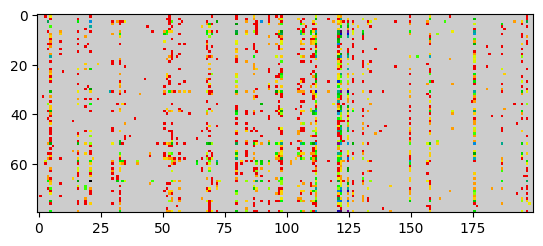

In [221]:
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim

from fastai.data.transforms import RandomSplitter
from collections import defaultdict

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)

hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))

high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

sums = []

column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0

embedLayer = []
for i in high_variance_columns:
        intermediate = []
        for i in adata.X.getcol(i).toarray():
            intermediate.append(i[0])
        embedLayer.append(intermediate)
        
mat_for_embed = np.random.rand( 5905, 200)
for key,col in enumerate(list(high_variance_columns)[:200]):
    m= adata.X.getcol(col)
    m = m.todense().tolist()
    for row,val in enumerate(m):
        mat_for_embed[row, key] = val[0]
        
import matplotlib.pyplot as plt
import numpy as np

a = mat_for_embed
plt.imshow(a[:80], cmap='nipy_spectral_r', interpolation='nearest')
plt.show()

In [206]:
#len(list(filter(lambda x: x > 0,mat_for_embed[])))
U, S, Vh = torch.linalg.svd(torch.tensor(mat_for_embed))
#U.shape

torch.Size([5905, 5905])

In [304]:

 #
 #rename from 0-30k to 0-200
count = 0
cont_keys = {}
for key in filteredGeneCellLists:
    cont_keys[key] = count
    count += 1

continuousFilteredGeneCellLists = {}

for k in list(filteredGeneCellLists.keys()):
    continuousFilteredGeneCellLists[cont_keys[k]] = filteredGeneCellLists[k]
    
#continuousFilteredGeneCellLists
#cont_keys
#len(list(continuousFilteredGeneCellLists.keys()))
#cellCountWithinGroup
#zscore
#

#3.4028237 * 10^38
#continuousFilteredGeneCellLists check
# x = cells in group(s) , cellCountWithinGroup
# y = genes affected 
# z = cluster number

#for each cell
#make a graph -> 

#
#negative * negative = positive, 

#x  cluster "name" or index (clusters should change)
#y = genes above/below threshold 
#z = total dist above threshold


#convert 200 dimensions to 3

cellGroups = [0 for i in list(range(5905))]
cellGroupLengths = [0 for i in list(range(5905))]
cellDistCounts = [0 for i in list(range(5905))]
for column in continuousFilteredGeneCellLists:
    for cell in continuousFilteredGeneCellLists[column]:
        cellGroups[cell] = column
        cellGroupLengths[cell] = len(continuousFilteredGeneCellLists[column])
        

#len(list(filter(lambda x: x > 0, cellGroupLengths)))
#30,000 digits -> 38 * 38 * 38 -> max 50,000 genes
#on or off
#binary 
#38+38+38 length list 
for idx, row in enumerate(mat_for_embed):
    for val in row: 
        cellDistCounts[idx] += val


In [307]:
#solve it from because it helps the wizards and its fun !
##   *
#   /_\
#  (@@)
#  -T-
#  /\
# |  \
#_|  \_
#
#




from scipy import stats
import numpy as np
d = [1, 2, 3]
A = np.diag(d)  # a diagonal covariance matrix
x = [4, -2, 5]  # a point of interest
#dist = stats.multivariate_normal(mean=[0, 0, 0], cov=mat_for_embed[:200])



#U, S, Vh = torch.linalg.svd(torch.tensor(mat_for_embed))
#U

#38
#38
#38
#38 + 38 + 38 = 115 slots

mat_for_embed # vals
mat_for_embed #list of indices from clusters
mat_for_embed[0].nonzero()[0]
#100,000 = 200 * 5000 - 21 nonzeros in a cell - store 1

array([  5,  31,  51,  66,  68,  84,  87,  88,  98, 106, 110, 111, 112, 121, 122, 125, 144, 150, 158, 176, 195])

In [402]:
import torch
import torch.nn as nn
import torch.optim as optim
data = torch.Tensor(mat_for_embed)
#makeCoolStuff = [[float(k) for k in range(1)] for i in range(200)]
#do what they want - invent from scratch

cat_ = [i for i in (cellGroups,
cellGroupLengths,
cellDistCounts)]

mat2 = []
for col in cat_:
    l = []
    for row in col: 
        l.append(row)
    mat2.append(l)
    
#am = torch.cat((cat_[0], cat_[1], cat_[2]), 1)
am = torch.tensor(mat2)
def customGeneMatrixFindPerturbations(M):
    m = torch.ones(200, 5905)
    m = M @ m
    m = m @ torch.ones(5905, 50)
    m = m @ torch.ones(50, 32).triu()
    m = m @ torch.eye(32, 3).cos()
    #m = m.float() @ am.float()
    #torch.stft(m, 128)
    # 3 numbers from 0 - 1
    # cells in group(s) = x, cellCountWithinGroup
    # genes affected = y, 
    # z = cluster number,
    return m
#    return M @ torch.ones(5905, 50)@ torch.ones(50, 32).triu()  @ torch.eye(32, 3).cos()

class λλλ(nn.Module):
    def __init__(self, idn, edn):
        super(λλλ, self).__init__()
        self.λ = nn.Sequential(nn.Linear(idn, edn))
    def forward(self, x):
        return customGeneMatrixFindPerturbations(x)
model = λλλ(data.shape[1], 3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 1000

# encoder_layer = nn.TransformerEncoderLayer(d_model=80, nhead=8)
# transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=3)
# src = torch.rand(20, 80)
# out = transformer_encoder(src)

# for epoch in range(num_epochs):
#     output = model(data)
#     #loss = criterion(output, data)
#     #optimizer.zero_grad()
#     #loss.backward()
#     #optimizer.step()
#     #     if epoch % 100 == 0:
#     #         print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item():.4f}')
#     if epoch % 100 == 0: print('finish demo ', epoch)

λλλλλ = model(data)
λλλλλ.shape#, data.shape

torch.Size([5905, 3])

In [392]:
tensor1 = torch.rand(5905, 50)
tensor2 = torch.rand(5905, 50)  # Note the shape change
result =  tensor2 * tensor1
torch.eye(3) @ torch.rand(3,3,3)
λλλλλ.shape

















torch.Size([5905, 5905])

In [377]:
# mat1 = torch.randn(2, 3)
# mat2 = torch.randn(3, 3)
# torch.mm(mat1, mat2)

λλλλλ = λλλλλ @ torch.eye(3)
a= torch.eye(3)
a.cos()

tensor([[0.5403, 1.0000, 1.0000],
        [1.0000, 0.5403, 1.0000],
        [1.0000, 1.0000, 0.5403]])

In [ ]:
#plot the matrix before + after - 200x6k to 3x6k -> bright colors for rows with perturbations 
#perturbations defined as belonging to a group of rows that have multiple columns that are covarying from mean-zscore
#makeCoolStuff = [[float(k) for k in range(5905)] for i in range(200)]
tensor2 = torch.rand(5905, 200)

tensor3 = torch.rand(5905, 50)
tensor2.shape,tensor3.shape 
#(tensor2.t() @ tensor3.t()).shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = mat_for_embed
plt.imshow(λλλλλ[:3,].detach(), cmap='nipy_spectral_r', interpolation='nearest')
plt.show()

In [ ]:
#https://www.10xgenomics.com/resources/datasets/5-k-a-549-lung-carcinoma-cells-no-treatment-transduced-with-a-crispr-pool-3-1-standard-6-0-0
# all_url = [
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406675_10X001.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406677_10X005.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406681_10X010.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AissaBenevolenskaya2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/ChangYe2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2017.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DixitRegev2016.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_protein.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_RNA.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_atscale.h5ad?download=1",
    
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_highMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_lowMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GehringPachter2019.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/McFarlandTsherniak2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/NormanWeissman2019_filtered.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_essential.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_gwps.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_rpe1.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE106340.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE115943.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ShifrutMarson2018.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex2.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex3.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex4.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_day7neuron.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_iPSC.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRa.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRi.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/WeinrebKlein2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/XieHon2017.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ZhaoSims2021.h5ad?download=1"
# ]

# import requests
 
# # def download_url(url):
# #   print("downloading: ",url)
# #   # assumes that the last segment after the / represents the file name
# #   # if url is abc/xyz/file.txt, the file name will be file.txt
# #   file_name_start_pos = url.rfind("/") + 1
# #   file_name = url[file_name_start_pos:]
 
# #   r = requests.get(url, stream=True)
# #   if r.status_code == requests.codes.ok:
# #     with open(file_name, 'wb') as f:
# #       for data in r:
# #         f.write(data)

# #for link in url: download_url(link)
#     #https://zenodo.org/record/7058382
    
# #find data set with some perturbed and some not
# #train on a half with some of both 
# #apply to other half and see if predictions are true


# import requests
# from multiprocessing.pool import ThreadPool

# # def download_url(url):
# #   print("downloading: ",url)
# #   # assumes that the last segment after the / represents the file name
# #   # if url is abc/xyz/file.txt, the file name will be file.txt
# #   file_name_start_pos = url.rfind("/") + 1
# #   file_name = url[file_name_start_pos:]

# #   r = requests.get(url, stream=True)
# #   if r.status_code == requests.codes.ok:
# #     with open(file_name, 'wb') as f:
# #       for data in r:
# #         f.write(data)
# #   return url

# # results = ThreadPool(5).imap_unordered(download_url, url)
# # for r in results:
# #     print(r)

# import requests
# from bs4 import BeautifulSoup
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import os
# from tqdm import tqdm
# from PIL import Image
# from io import BytesIO

# root_url = "https://zenodo.org/record/7058382"

# def download_file(file_path):
#     if os.path.isfile(folders+file_path): return print(f"${file_path} already exists")
#     url = f"{file_path}"
#     print(url)
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#     except requests.exceptions.RequestException as e:
#         print(f"Error downloading {file_path}: {e}")
#         return None

#     if response.status_code == 200:
#         # Extract the directory and filename from the file path
#         directory, filename = os.path.split(file_path)
#         # Create the directory if it doesn't exist
#         os.makedirs(directory, exist_ok=True)
#         # Save the file as JPEG
#         try:
#             image = Image.open(BytesIO(response.content))
#             image.save(file_path, "JPEG")
#             return file_path
#         except IOError:
#             return None
#     else:
#         return None

# # Send an HTTP GET request to the URL
# response = requests.get(root_url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Parse the HTML content of the response
#     #soup = BeautifulSoup(response.content, 'html.parser')

#     # Find all <a> tags that represent links
#     #links = soup.find_all('a')

#     # Extract the href attribute of each link
#     file_urls = all_url

#     # Create a ThreadPoolExecutor with maximum 256 worker threads
#     executor = ThreadPoolExecutor(max_workers=20)

#     # Use a list to store the download tasks
#     tasks = []

#     # Use tqdm to create a progress bar
#     with tqdm(total=len(file_urls)) as progress_bar:
#         error_count = 0
#         # Submit the download tasks
#         for file_name in file_urls:
#             task = executor.submit(download_file, file_name)
#             tasks.append(task)

#         # Process the completed tasks
#         for completed_task in as_completed(tasks):
#             result = completed_task.result()
#             if result is None:
#                 error_count += 1
#             progress_bar.update(1)

#     print(f"All downloads completed, errors: {error_count}")

# from time import sleep

# def add_features(df):
# #     df['LogFare'] = np.log1p(df['Fare'])
# #     df['Deck'] = df.Cabin.str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E="DE", F="FG", G="FG"))
# #     df['Family'] = df.SibSp+df.Parch
# #     df['Alone'] = df.Family==0
# #     df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
# #     df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
# #     df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master"))
# #    df.drop(columns=['n_perts'])
#     return 10
# loss_function = torch.nn.CrossEntropyLoss()
#test_predictions = torch.softmax(model(t_indep), 1)
# test_predictions = model(trn_indep)
# # test_accuracy = flaoat(sum(test_predictions == y_test)) / y_test.shape[0]
# # print("\nFinal Test Accuracy: {}".format(test_accuracy))
#df

#scarches.dataset.remove_sparsity(adata)
#https://docs.scarches.org/en/latest/api/models.html
# mdata = muon.read_10x_h5("pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5")
# scvi.model.TOTALVI.setup_mudata(mdata, modalities={"rna_layer": "rna": "protein_layer": "prot"})
# vae = scvi.model.TOTALVI(mdata)
#https://docs.scvi-tools.org/en/stable/api/reference/scvi.module.LDVAE.html
#[i for i in test_predictions.tolist() if i < 1]
# Regularization in Logistic Regression
# Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:

# L2 regularization.
# Early stopping, that is, limiting the number of training steps or the learning rate.
# (We'll discuss a third strategy—L1 regularization—in a later module.)

# Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each.

# Fortunately, using L2 or early stopping will prevent this problem.
#[ x for x in [iden(sum(item), 10)  for item in test_predictions.tolist()] if x > .1]
#plot(loss_track)

def plot_loss(l):
    plt.figure(figsize=(20, 4))
    legends = []

#     blue = [i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]]
#     oj =[i for k,i in enumerate(rowGeneExpression.values()) if not dependent_variables[k]]
#     blue.sort()
#     oj.sort()
#     plt.plot((blue)) #blue true peturbation 
    plt.plot(l) #orange false ctrl

    #legends.append('param %d' % i)
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);
# #https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02021-3

# # Medicine Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
# #Biology Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
# #Other applications Financial and logistical forecasting, text to speech, and much more…
# # humor analysis - larry david vs seinfeld ? 
#https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework
#handle "values outside of domain" by "SVM"
#random forest classifier
#logisitc regression - hard to get right
#correct transformations, outlier handling, correct interactions
#os.listdir('./data_sets')
#wget -m http://www.example.com 2>&1 | grep '^--' | awk '{ print $3 }' | grep -v '\.\(css\|js\|png\|gif\|jpg\|JPG\)$' > urls.txt
#https://academic.oup.com/bib/article/22/4/bbaa268/5943793
#plot(loss_track)